In [1]:
import pandas as pd

In [2]:
# df16 = pd.read_csv("finbraRREO2016.csv", encoding='latin-1', skiprows=5, sep=';')
# df17 = pd.read_csv("finbraRREO2017.csv", encoding='latin-1', skiprows=5, sep=';')
# df18 = pd.read_csv("finbraRREO2018.csv", encoding='latin-1', skiprows=5, sep=';')
# df19 = pd.read_csv("finbraRREO2019.csv", encoding='latin-1', skiprows=5, sep=';')
# df20 = pd.read_csv("finbraRREO2020.csv", encoding='latin-1', skiprows=5, sep=';')
# df21 = pd.read_csv("finbraRREO2021.csv", encoding='latin-1', skiprows=5, sep=';')
# df22 = pd.read_csv("finbraRREO2022.csv", encoding='latin-1', skiprows=5, sep=';')
# df23 = pd.read_csv("finbraRREO2023.csv", encoding='latin-1', skiprows=5, sep=';')

tributacoes = ['ISS', 'IPTU', 'ITBI', 'Cota-Parte do ICMS', 'Cota-Parte do IPVA']
estados = ['PB', 'PE', 'AL', 'BA', 'RJ']

# df16 = df16[(df16['UF'].isin(estados)) & (df16['Conta'].isin(tributacoes))]
# df17 = df17[(df17['UF'].isin(estados)) & (df17['Conta'].isin(tributacoes))]
# df18 = df18[(df18['UF'].isin(estados)) & (df18['Conta'].isin(tributacoes))]
# df19 = df19[(df19['UF'].isin(estados)) & (df19['Conta'].isin(tributacoes))]
# df20 = df20[(df20['UF'].isin(estados)) & (df20['Conta'].isin(tributacoes))]
# df21 = df21[(df21['UF'].isin(estados)) & (df21['Conta'].isin(tributacoes))]
# df22 = df22[(df22['UF'].isin(estados)) & (df22['Conta'].isin(tributacoes))]
# df23 = df23[(df23['UF'].isin(estados)) & (df23['Conta'].isin(tributacoes))]


# df16['Ano'] = 2016
# df17['Ano'] = 2017
# df18['Ano'] = 2018
# df19['Ano'] = 2019
# df20['Ano'] = 2020
# df21['Ano'] = 2021
# df22['Ano'] = 2022
# df23['Ano'] = 2023

In [3]:
# df23['Conta'].unique()

In [4]:
# df = pd.concat([df16, df17, df18, df19, df20, df21, df22, df23])
# df.to_csv('finbraRREOgeral.csv', index=False)

In [5]:
df = pd.read_csv('finbraRREOgeral.csv')

In [6]:
df = df[df['Conta'].isin(tributacoes)]

In [7]:
cidades = ['João Pessoa', 'Cabedelo', 'Conde - PB', 'Lucena', 'Rio Tinto', 'Mataraca', 'Baía da Traição', 'Pitimbu', 'marcação', 'Ipojuca', 'Maragogi - AL', 'Mata de São João', 'Búzios', 'Arraial do Cabo', 'Paraty']
regex = '|'.join(cidades)
df = df[df['Instituição'].str.contains(regex, case=False, na=False)]

In [8]:
df.info() # Sem valores faltantes

<class 'pandas.core.frame.DataFrame'>
Index: 7980 entries, 3137 to 491964
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Instituição             7980 non-null   object
 1   Cod.IBGE                7980 non-null   int64 
 2   UF                      7980 non-null   object
 3   População               7980 non-null   int64 
 4   Coluna                  7980 non-null   object
 5   Conta                   7980 non-null   object
 6   Identificador da Conta  7980 non-null   object
 7   Valor                   7980 non-null   object
 8   Ano                     7980 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 623.4+ KB


In [9]:
import matplotlib.pyplot as plt

# Convert the 'Valor' column to numeric, removing any commas
df['Valor'] = df['Valor'].str.replace(',', '').astype(float)

# Get the distinct 'Conta' values
contas = df['Conta'].unique()

In [10]:
df = df.groupby(['Instituição', 'Conta', 'Ano']).agg({'Valor': 'sum', 'População': 'mean'}).reset_index()


In [11]:
anos_completos = pd.Series(range(2016, 2024))
novo_df = []

# Preenchendo valores faltantes

for instituicao in df['Instituição'].unique():
    for conta in df['Conta'].unique():
        df_q = df.query('Instituição == @instituicao & Conta == @conta')
        df_q = df_q.set_index('Ano').reindex(anos_completos)
        df_q['Valor'] = df_q['Valor'].interpolate()
        df_q['População'] = df_q['População'].interpolate()
        df_q['Instituição'] = instituicao
        df_q['Conta'] = conta
        df_q = df_q.reset_index()
        novo_df.append(df_q)

df = pd.concat(novo_df)

In [12]:
df.rename(columns={'index': 'Ano'}, inplace=True)

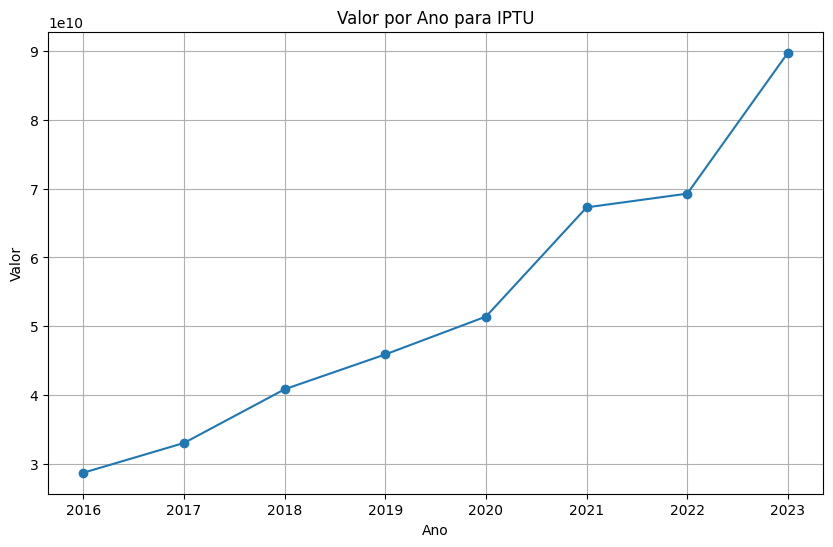

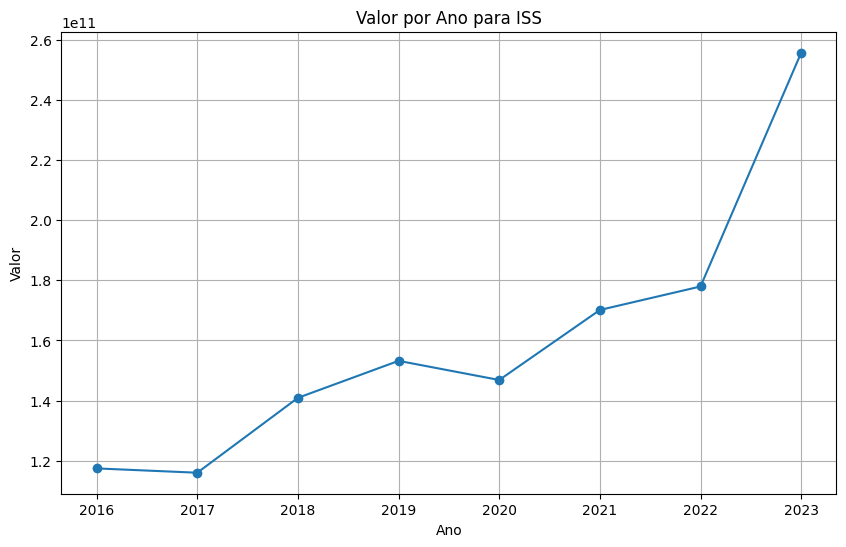

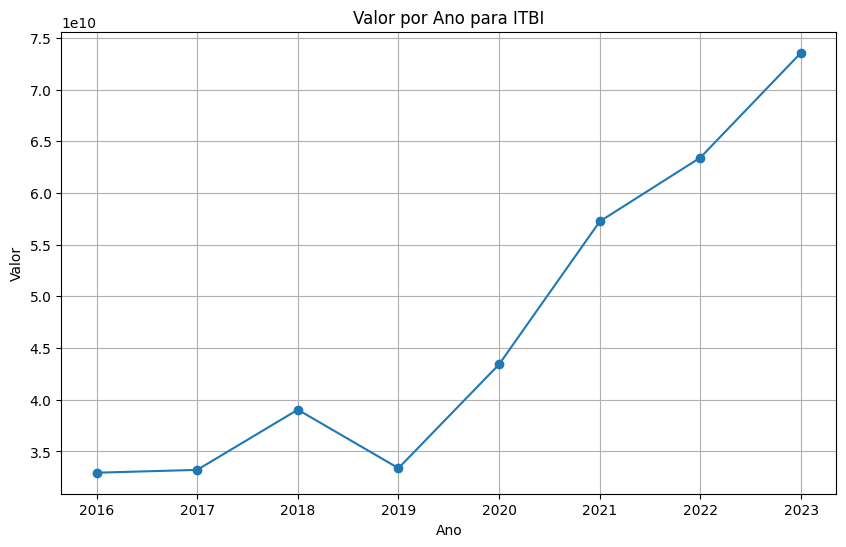

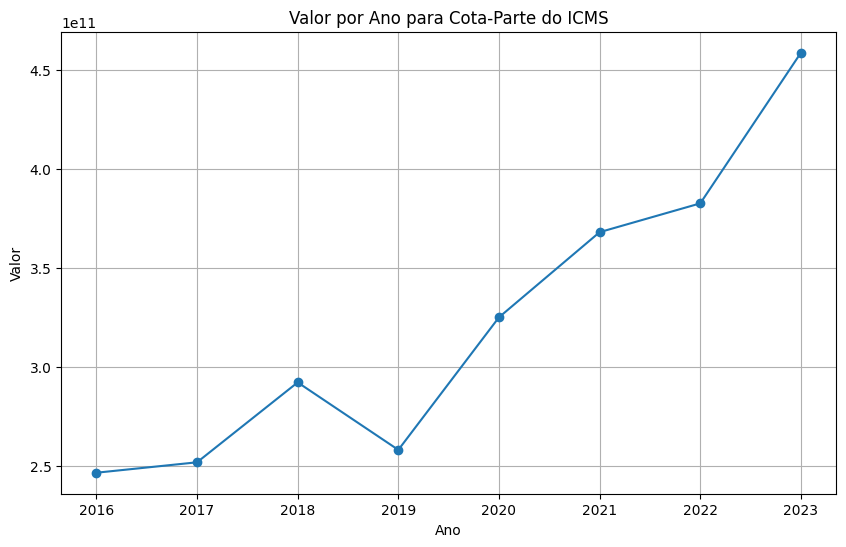

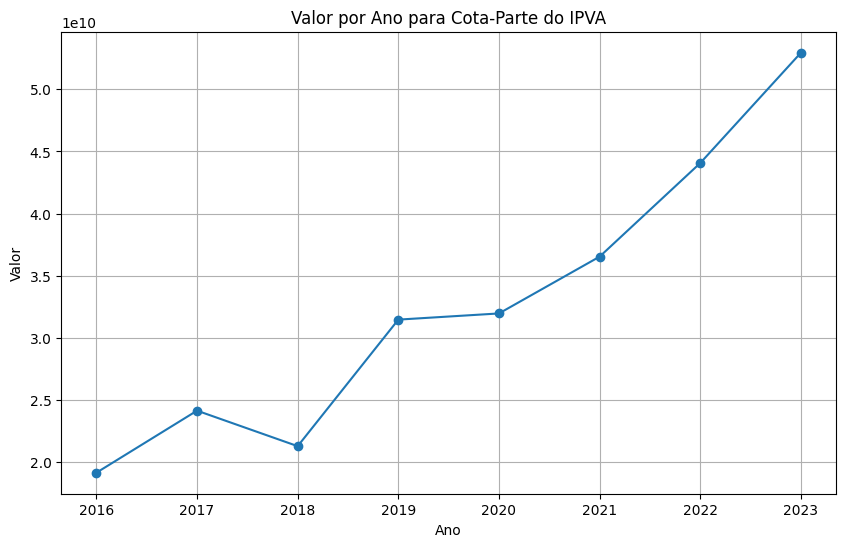

In [13]:
for conta in contas:
    df_conta = df[df['Conta'] == conta]
    df_conta = df_conta.groupby(['Ano', 'Conta'])['Valor'].sum().reset_index()
    plt.figure(figsize=(10, 6))
    plt.plot(df_conta['Ano'], df_conta['Valor'], marker='o')
    plt.title(f'Valor por Ano para {conta}')
    plt.xlabel('Ano')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.show()

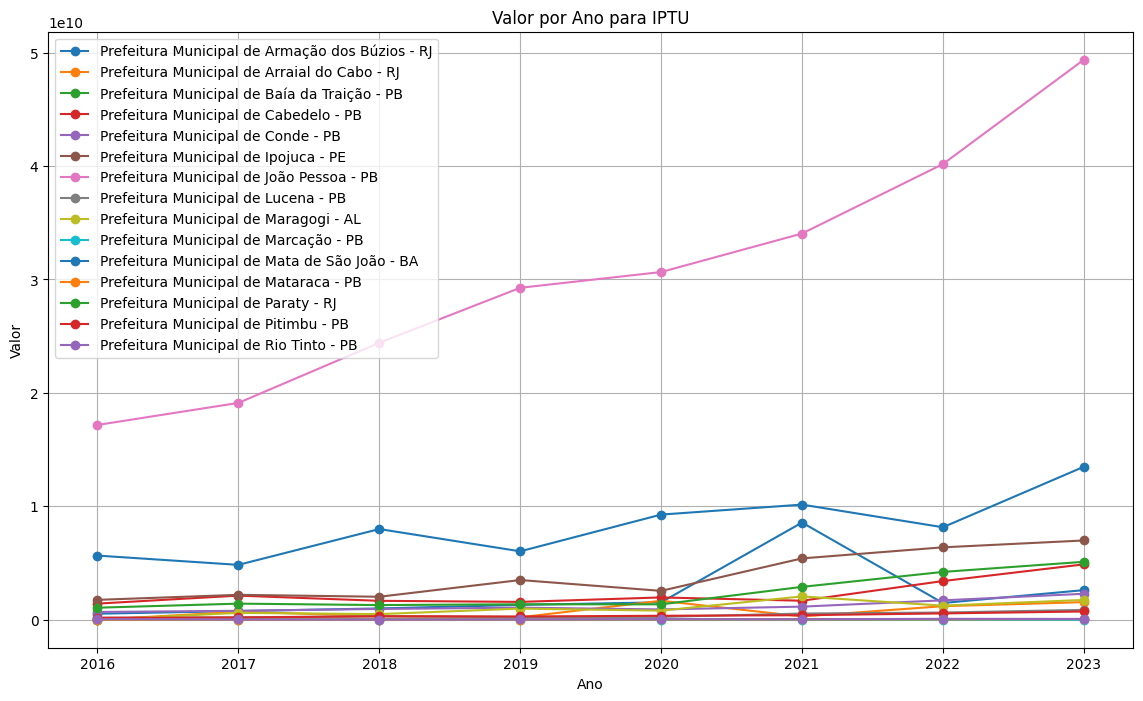

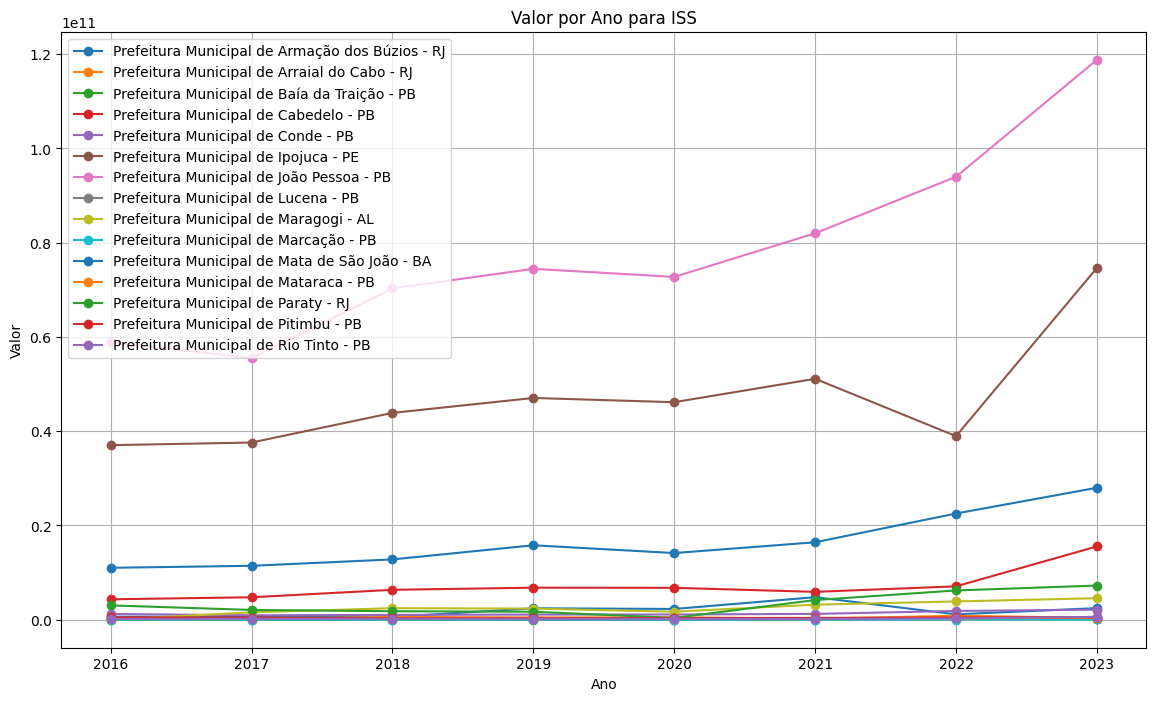

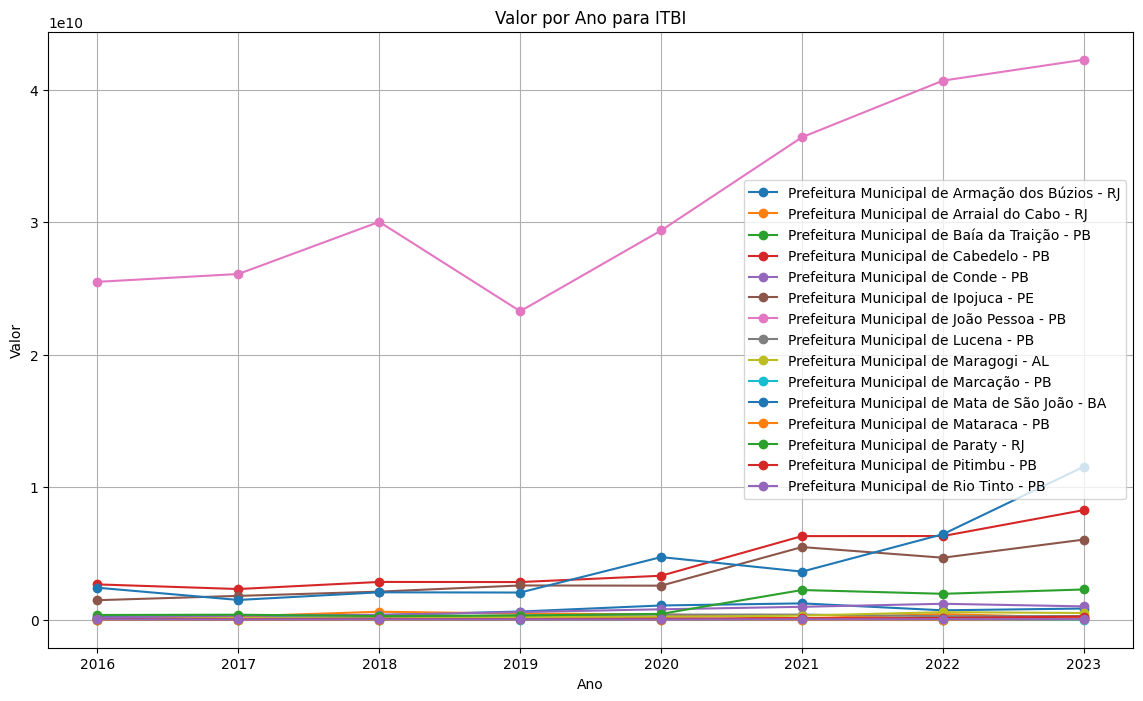

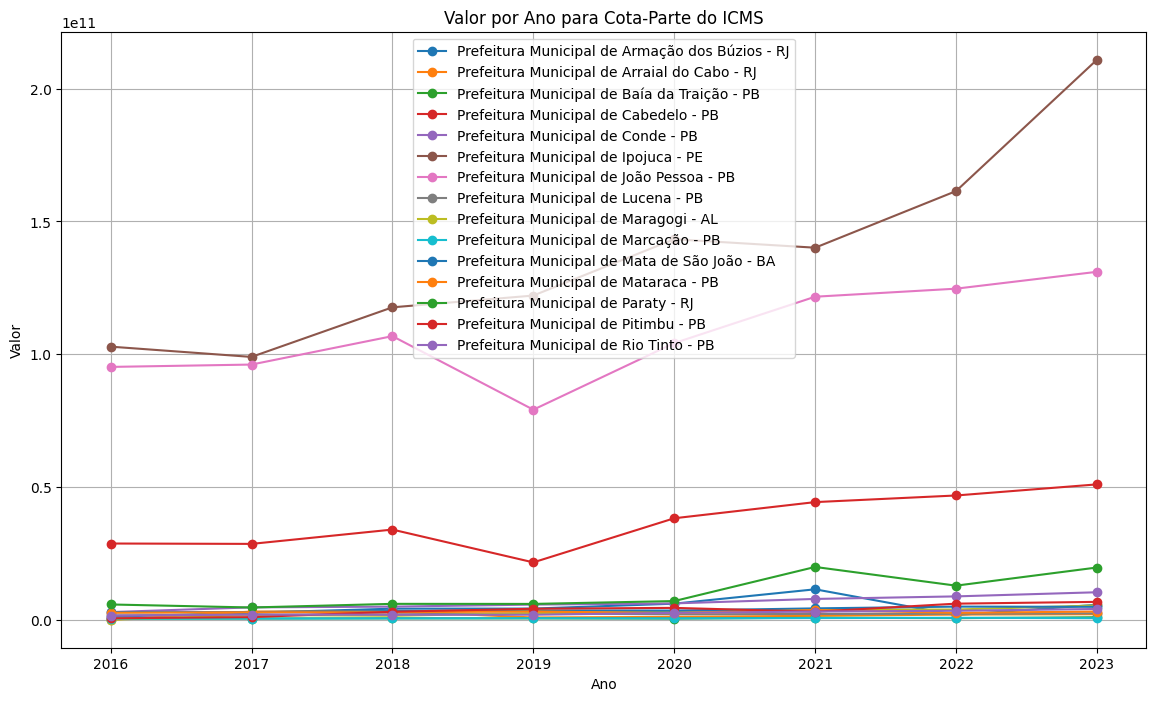

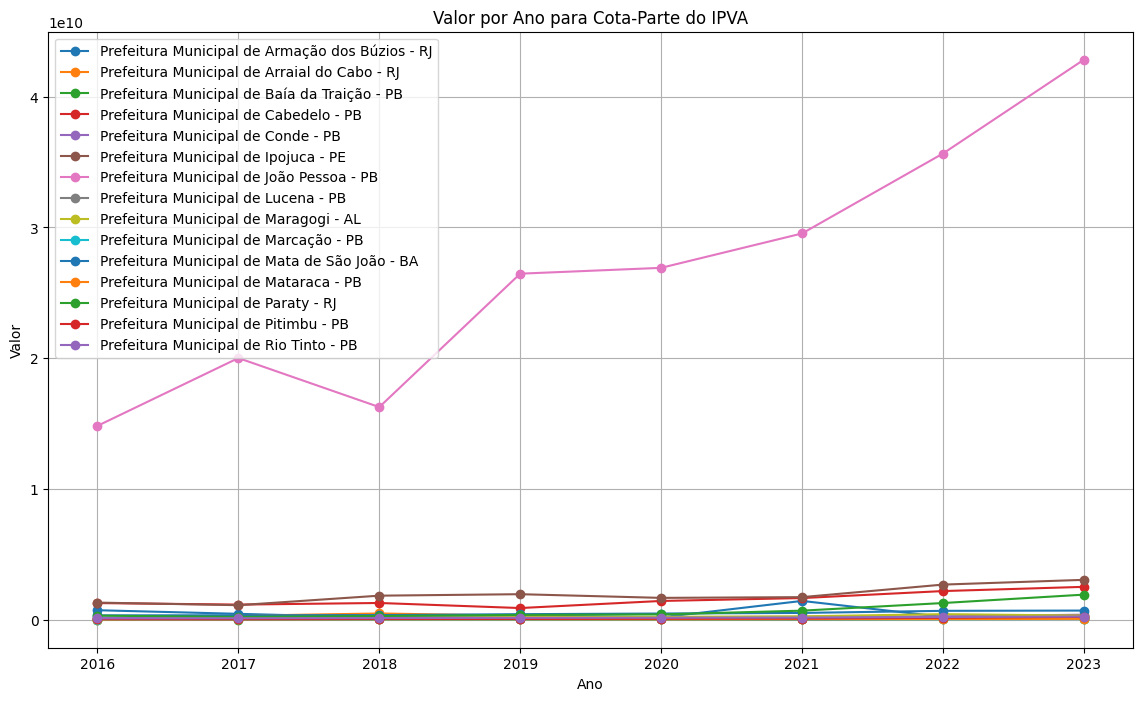

In [14]:
for conta in contas:
    df_conta = df[df['Conta'] == conta]
    df_conta = df_conta.groupby(['Ano', 'Conta', 'Instituição'])['Valor'].sum().reset_index()
    plt.figure(figsize=(14, 8))
        
    for instituicao in df_conta['Instituição'].unique():
        df_instituicao = df_conta[df_conta['Instituição'] == instituicao]
        plt.plot(df_instituicao['Ano'], df_instituicao['Valor'], marker='o', label=instituicao)
    
    plt.title(f'Valor por Ano para {conta}')
    plt.xlabel('Ano')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.legend()
    plt.show()


In [15]:
df['Conta'].unique()

array(['Cota-Parte do ICMS', 'Cota-Parte do IPVA', 'IPTU', 'ISS', 'ITBI'],
      dtype=object)

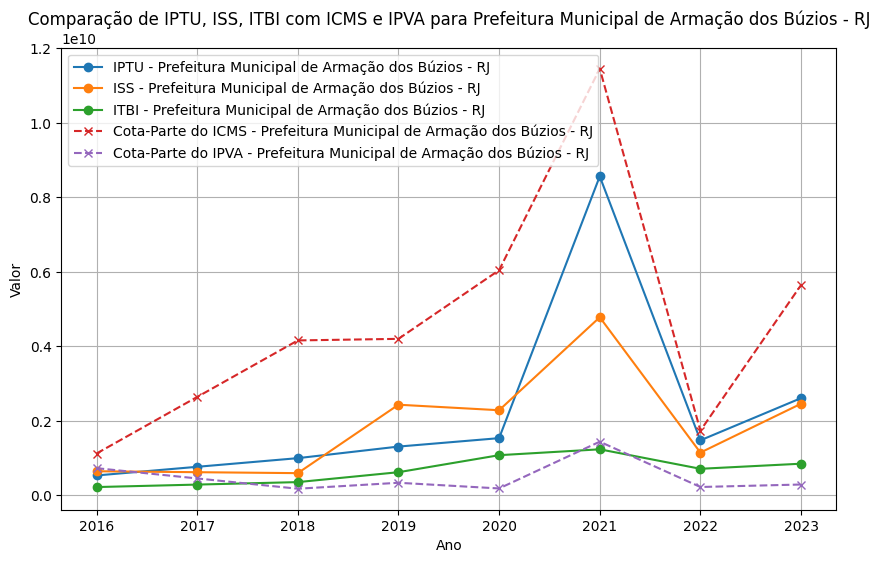

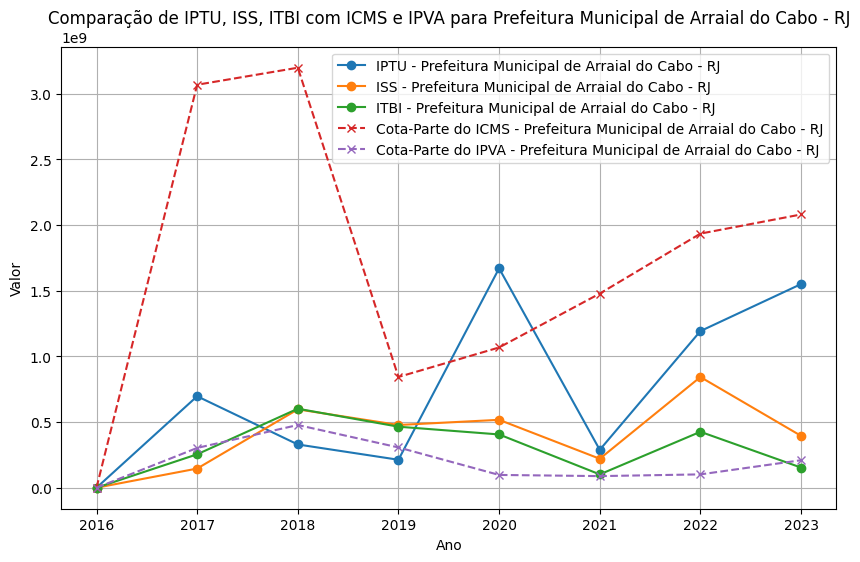

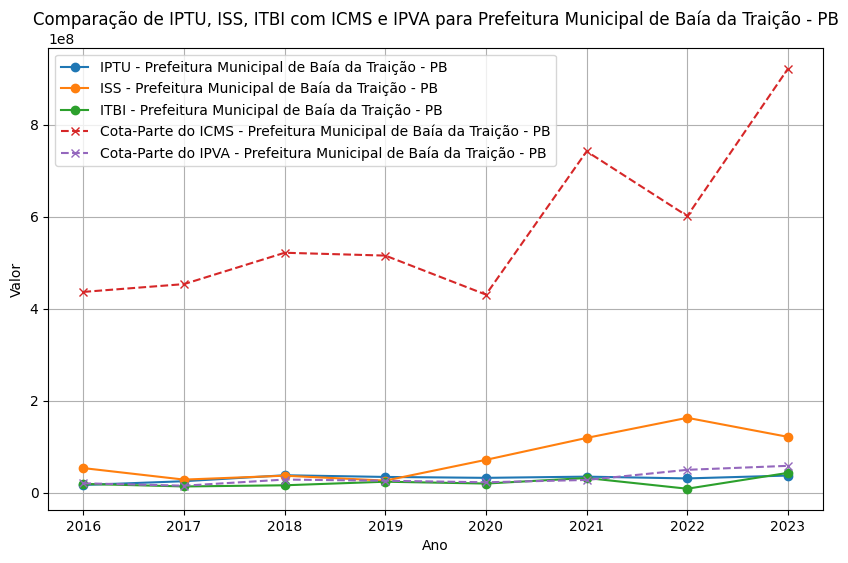

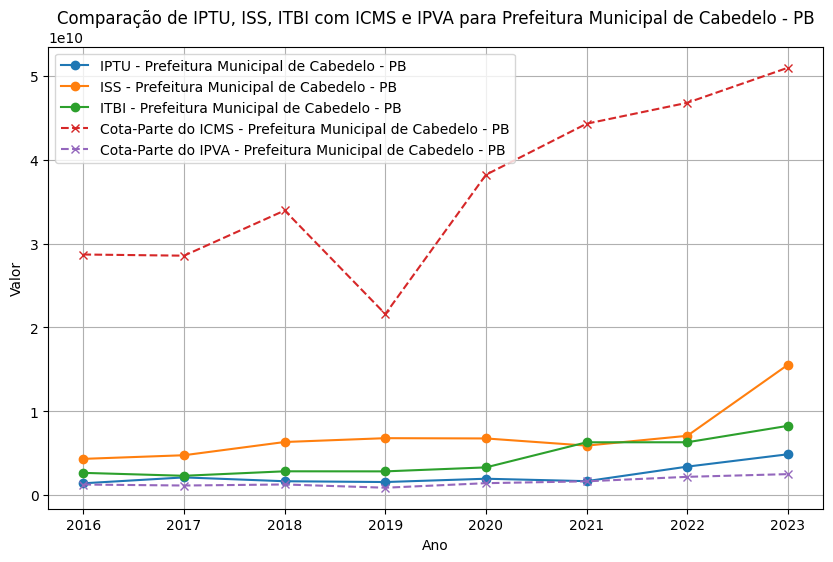

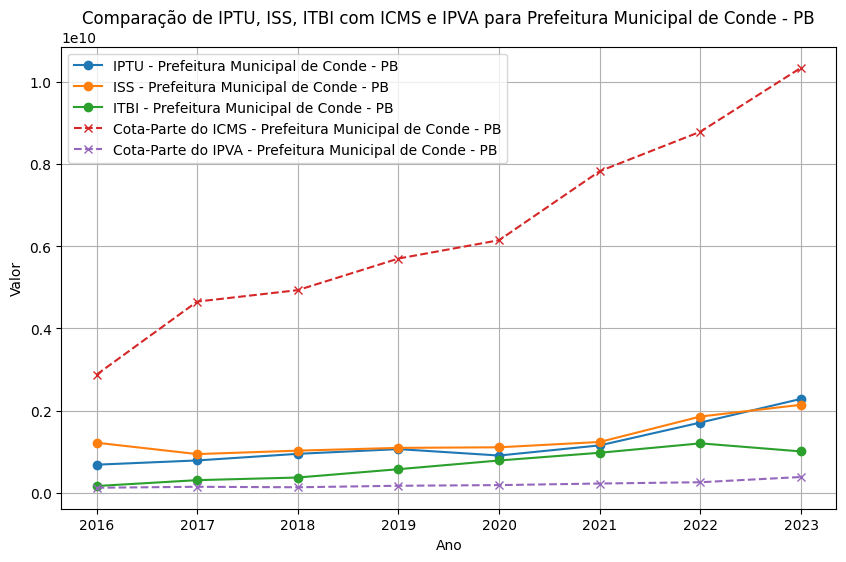

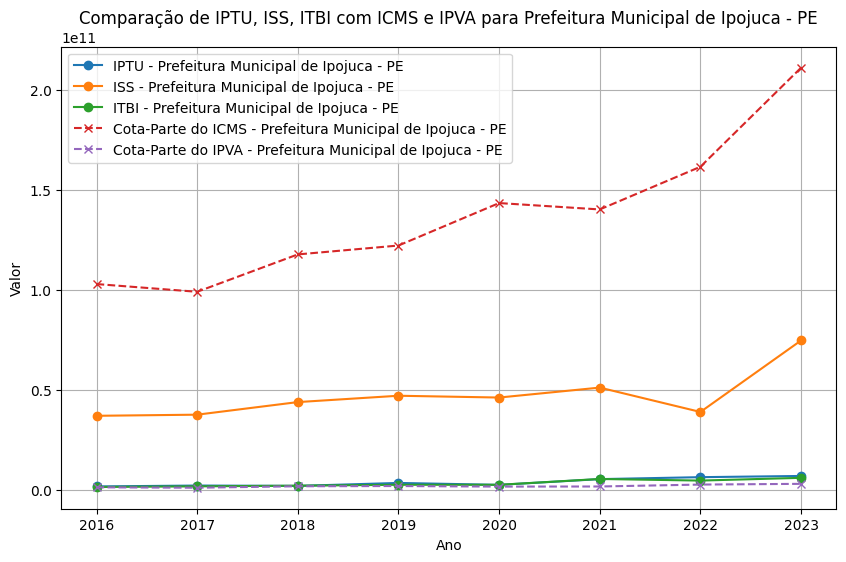

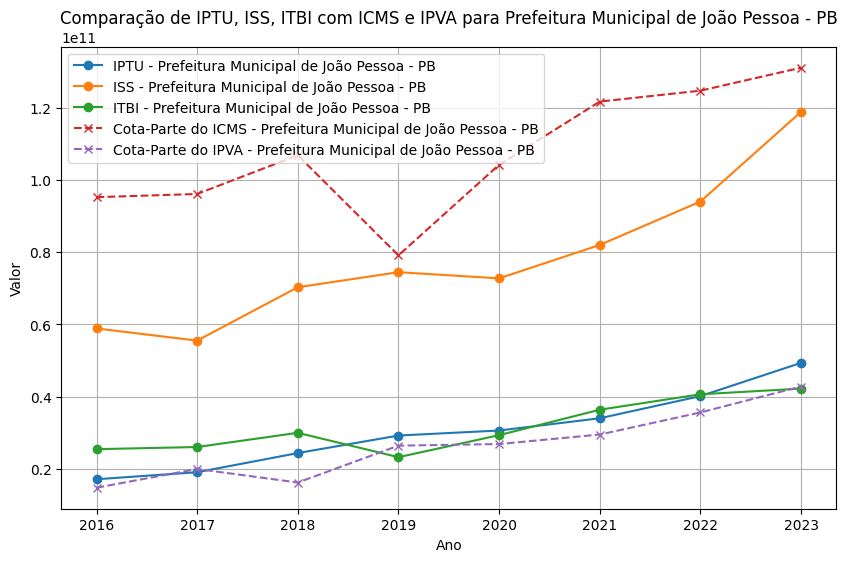

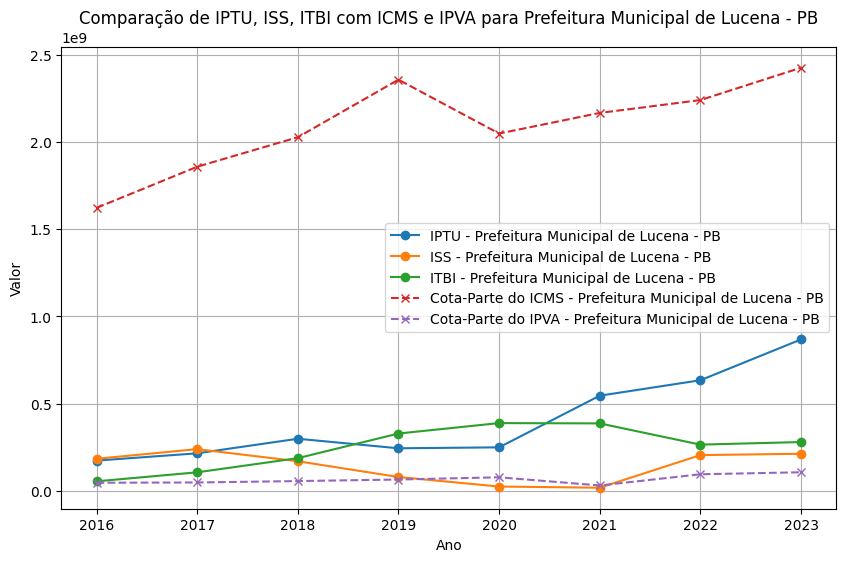

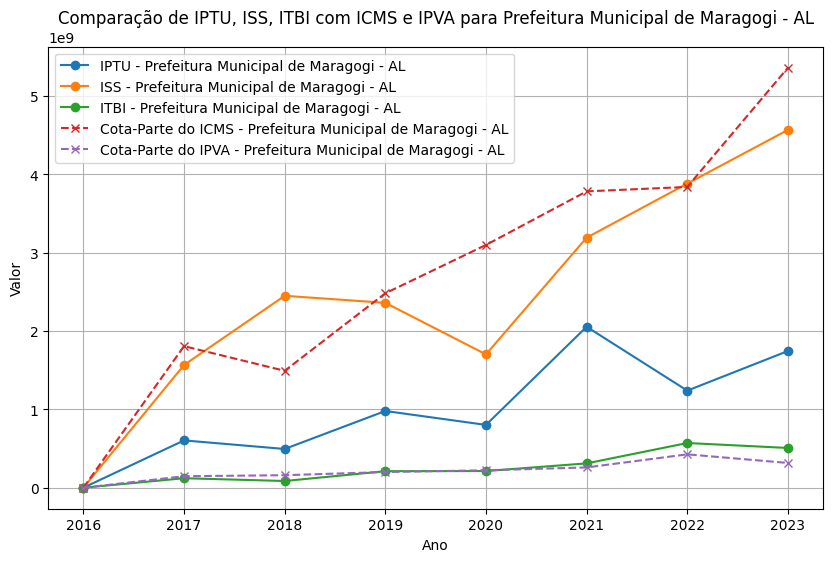

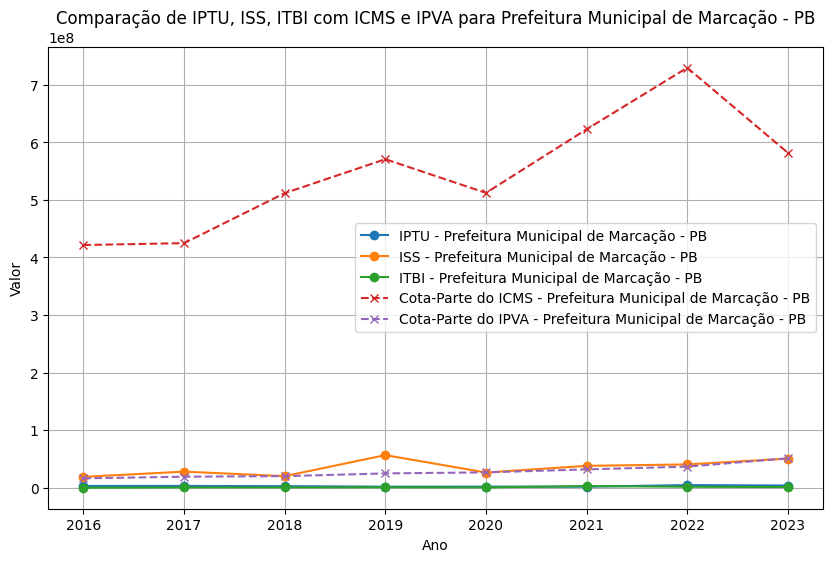

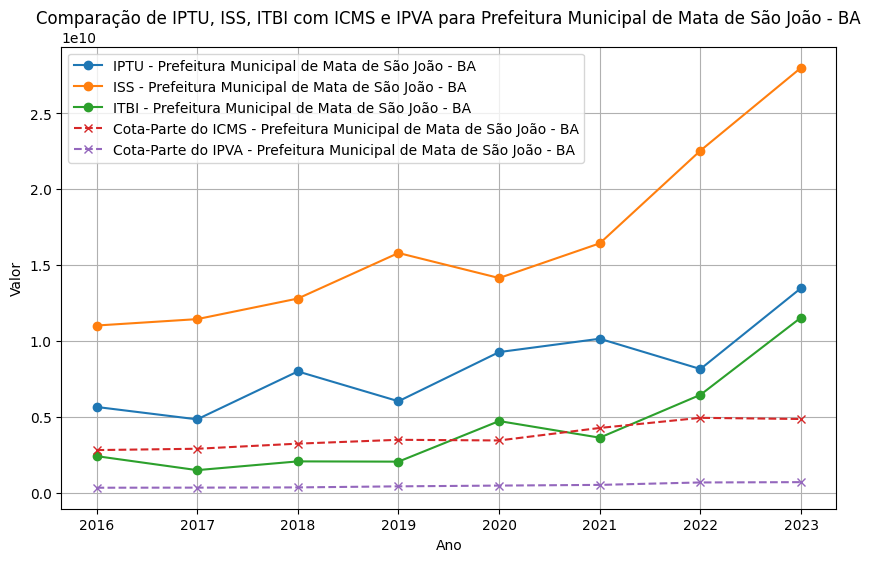

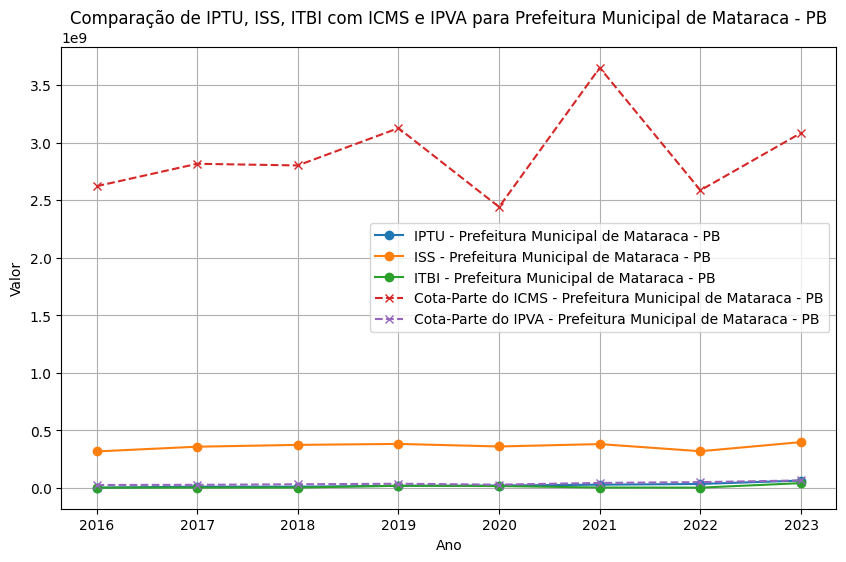

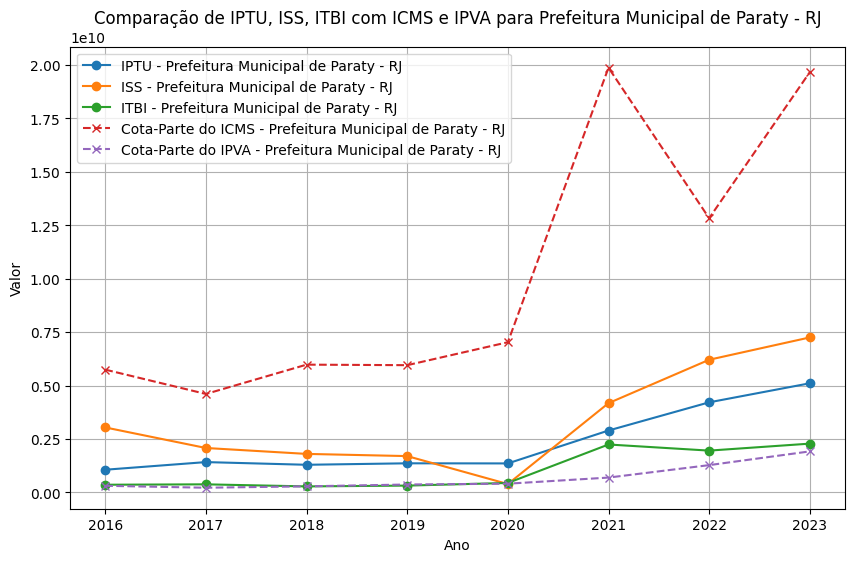

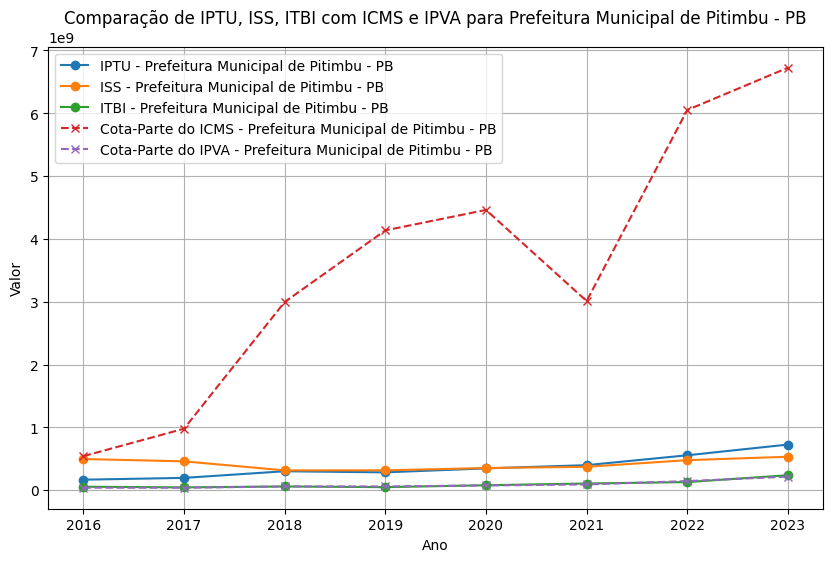

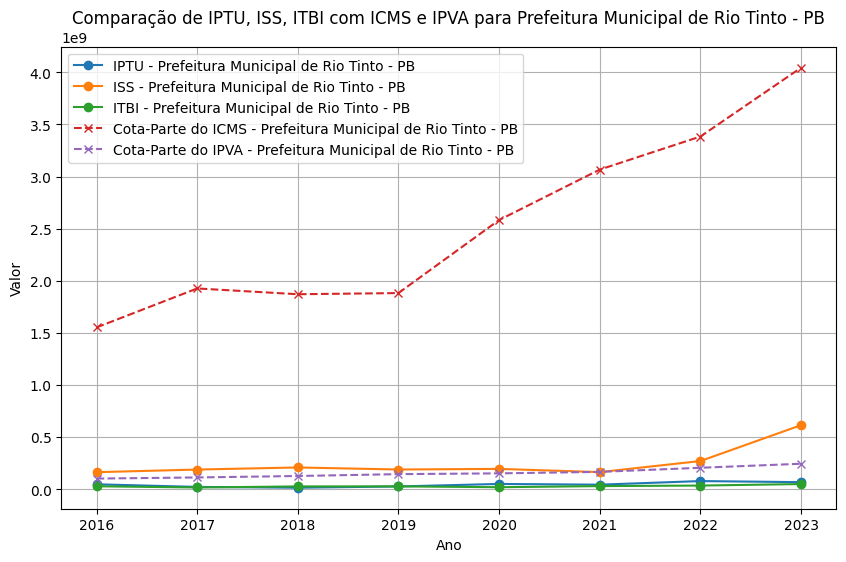

In [16]:
for cidade in df['Instituição'].unique():
    plt.figure(figsize=(10, 6))
    
    for conta in ['IPTU', 'ISS', 'ITBI']:
        df_conta = df[(df['Conta'] == conta) & (df['Instituição'].str.contains(cidade, case=False, na=False))]
        df_conta = df_conta.groupby(['Ano', 'Conta'])['Valor'].sum().reset_index()
        plt.plot(df_conta['Ano'], df_conta['Valor'], marker='o', label=f'{conta} - {cidade}')
    
    for conta in ['Cota-Parte do ICMS', 'Cota-Parte do IPVA']:
        df_conta = df[(df['Conta'] == conta) & (df['Instituição'].str.contains(cidade, case=False, na=False))]
        df_conta = df_conta.groupby(['Ano', 'Conta'])['Valor'].sum().reset_index()
        plt.plot(df_conta['Ano'], df_conta['Valor'], marker='x', linestyle='--', label=f'{conta} - {cidade}')
    
    plt.title(f'Comparação de IPTU, ISS, ITBI com ICMS e IPVA para {cidade}')
    plt.xlabel('Ano')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.legend()
    plt.show()

Transforme as séries dos últimos 8 anos em um vetor de 7 coordenadas, correspondente aos valores percentuais de um ano para o seguinte, note que o primeiro ano não tem referência, por isso são só 7 valores.

In [17]:
tributacoes = ['ISS', 'IPTU', 'ITBI']
df = df[df['Conta'].isin(tributacoes)]
df = df.sort_values(['Instituição', 'Conta', 'Ano'])

In [18]:
def calcular_variacao_percentual(df):
    # Ordena por Ano
    df = df.sort_values(by='Ano')
    
    # Calcula a variação percentual para 'Valor' e 'População' (de um ano para o seguinte)
    df['Variacao_Valor'] = df['Valor'].pct_change() * 100
    df['Variacao_Populacao'] = df['População'].pct_change() * 100
    
    # Remove o primeiro ano, pois não tem variação (NaN)
    # df = df.dropna(subset=['Variacao_Valor', 'Variacao_Populacao'])
    
    # Transforma as variações em listas/vetores de 7 coordenadas
    vetor_valor = df['Variacao_Valor'].tolist()#[-7:]
    vetor_populacao = df['Variacao_Populacao'].tolist()#[-7:]
    
    return vetor_valor, vetor_populacao


# calcular_variacao_percentual(df.query("Instituição == 'Prefeitura Municipal de Armação dos Búzios - RJ' & Conta == 'ISS'"))


novo_df = []
for instituicao in df['Instituição'].unique():
    for conta in df['Conta'].unique():
        df_q = df.query('Instituição == @instituicao & Conta == @conta')
        df_q['Variacao_Valor'], df_q['Variacao_Populacao'] = calcular_variacao_percentual(df_q)
        novo_df.append(df_q)

df = pd.concat(novo_df)

C:\Users\Home\AppData\Local\Temp\ipykernel_19628\2010713661.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q['Variacao_Valor'], df_q['Variacao_Populacao'] = calcular_variacao_percentual(df_q)
C:\Users\Home\AppData\Local\Temp\ipykernel_19628\2010713661.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q['Variacao_Valor'], df_q['Variacao_Populacao'] = calcular_variacao_percentual(df_q)
C:\Users\Home\AppData\Local\Temp\ipykernel_19628\2010713661.py:26: SettingWithCopyWarning: 
A value is trying 

In [19]:
df

,Ano,Instituição,Conta,Valor,População,Variacao_Valor,Variacao_Populacao
0,2016,Prefeitura Municipal de Armação dos Búzios - RJ,IPTU,5.305153e+08,31067.0,NaN,NaN
1,2017,Prefeitura Municipal de Armação dos Búzios - RJ,IPTU,7.629106e+08,31370.5,43.805586,0.976921
2,2018,Prefeitura Municipal de Armação dos Búzios - RJ,IPTU,9.953059e+08,31674.0,30.461672,0.967469
3,2019,Prefeitura Municipal de Armação dos Búzios - RJ,IPTU,1.306247e+09,33240.0,31.240751,4.944118
4,2020,Prefeitura Municipal de Armação dos Búzios - RJ,IPTU,1.532814e+09,33870.0,17.344863,1.895307
...,...,...,...,...,...,...,...
3,2019,Prefeitura Municipal de Rio Tinto - PB,ITBI,2.777262e+07,24088.0,1.601241,-0.008302
4,2020,Prefeitura Municipal de Rio Tinto - PB,ITBI,1.968227e+07,24176.0,-29.130661,0.365327
5,2021,Prefeitura Municipal de Rio Tinto - PB,ITBI,3.044720e+07,24218.0,54.693539,0.173726
6,2022,Prefeitura Municipal de Rio Tinto - PB,ITBI,3.554810e+07,24258.0,16.753265,0.165166


Agora, faz-se uso de aprendizagem de máquina. Uma primeira técnica a ser utilizada é a ferramenta de predição. Estime os valores absolutos de todas as séries para os próximos dois anos. Neste ponto, vocês vão gerar diversos modelos de regressão. 
Dos 7 pontos que vocês tem para fazer a regressão, vocês vão pegar k deles para servirem de geração do modelo e os outros 7 − k vão ser usados para validar o modelo.
Para cada série vocês vão gerar os modelos para k variando de 2 até 6 (numa fase de ”cross validation”- validação cruzada).
Escolha os modelos com menores erros.

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from itertools import combinations
import numpy as np

# Função para prever os próximos dois anos e adicionar ao dataframe
def prever_proximos_anos(df):
    # Ordena por ano e filtra os últimos 7 anos
    df = df.sort_values(by='Ano').tail(7)
    
    anos = df['Ano'].values
    valores = df['Valor'].values
    populacoes = df['População'].values

    # Variáveis para armazenar o melhor modelo
    melhor_modelo_valor, melhor_modelo_populacao = None, None
    melhor_k_valor, melhor_k_populacao = None, None
    menor_erro_valor, menor_erro_populacao = float('inf'), float('inf')
    
    # Testar diferentes valores de k (2 até 6)
    for k in range(2, 7):
        combinacoes = list(combinations(range(7), k))
        
        # Testar todas as combinações de k pontos para treino
        for indices_treino in combinacoes:
            indices_validacao = list(set(range(7)) - set(indices_treino))
            
            # Regressão para a série 'Valor'
            X_treino_valor = anos[list(indices_treino)].reshape(-1, 1)
            y_treino_valor = valores[list(indices_treino)]
            X_validacao_valor = anos[list(indices_validacao)].reshape(-1, 1)
            y_validacao_valor = valores[list(indices_validacao)]
            
            modelo_valor = LinearRegression()
            modelo_valor.fit(X_treino_valor, y_treino_valor)
            
            # Previsão nos dados de validação
            predicoes_validacao_valor = modelo_valor.predict(X_validacao_valor)
            erro_valor = root_mean_squared_error(y_validacao_valor, predicoes_validacao_valor)
            
            # Se o erro for menor, guardamos o modelo
            if erro_valor < menor_erro_valor:
                melhor_modelo_valor = modelo_valor
                menor_erro_valor = erro_valor
                melhor_k_valor = k

            # Regressão para a série 'População'
            X_treino_populacao = anos[list(indices_treino)].reshape(-1, 1)
            y_treino_populacao = populacoes[list(indices_treino)]
            X_validacao_populacao = anos[list(indices_validacao)].reshape(-1, 1)
            y_validacao_populacao = populacoes[list(indices_validacao)]
            
            modelo_populacao = LinearRegression()
            modelo_populacao.fit(X_treino_populacao, y_treino_populacao)
            
            # Previsão nos dados de validação
            predicoes_validacao_populacao = modelo_populacao.predict(X_validacao_populacao)
            erro_populacao = root_mean_squared_error(y_validacao_populacao, predicoes_validacao_populacao)
            
            # Se o erro for menor, guardamos o modelo
            if erro_populacao < menor_erro_populacao:
                melhor_modelo_populacao = modelo_populacao
                menor_erro_populacao = erro_populacao
                melhor_k_populacao = k

    # Prever os próximos dois anos (2024 e 2025) com os melhores modelos
    anos_futuros = np.array([2024, 2025]).reshape(-1, 1)
    previsao_valor_futuro = melhor_modelo_valor.predict(anos_futuros)
    previsao_populacao_futuro = melhor_modelo_populacao.predict(anos_futuros)
    
    # Criar dataframe com os anos futuros e previsões
    df_futuro = pd.DataFrame({
        'Ano': [2024, 2025],
        'Instituição': [df['Instituição'].iloc[0]]*2,
        'Conta': [df['Conta'].iloc[0]]*2,
        'Valor': previsao_valor_futuro,
        'População': previsao_populacao_futuro,
        'Variacao_Valor': df['Variacao_Valor'].tolist()[-1:]*2,
        'Variacao_População': df['Variacao_Populacao'].tolist()[-1:]*2
    })
    
    # Concatenar os dados futuros ao dataframe original
    df_final = pd.concat([df, df_futuro], ignore_index=True)
    df_final['Valor_k'] = melhor_k_valor
    df_final['Populacao_k'] = melhor_k_populacao
    
    return df_final


novo_df = []
for instituicao in df['Instituição'].unique():
    for conta in df['Conta'].unique():
        df_q = df.query('Instituição == @instituicao & Conta == @conta')
        df_q = prever_proximos_anos(df_q)
        novo_df.append(df_q)

df_previsao = pd.concat(novo_df)


In [48]:
df_previsao.head()

,Ano,Instituição,Conta,Valor,População,Variacao_Valor,Variacao_Populacao,Variacao_População,Valor_k,Populacao_k
0,2017,Prefeitura Municipal de Armação dos Búzios - RJ,IPTU,7.629106e+08,31370.5,43.805586,0.976921,NaN,6,6
1,2018,Prefeitura Municipal de Armação dos Búzios - RJ,IPTU,9.953059e+08,31674.0,30.461672,0.967469,NaN,6,6
2,2019,Prefeitura Municipal de Armação dos Búzios - RJ,IPTU,1.306247e+09,33240.0,31.240751,4.944118,NaN,6,6
3,2020,Prefeitura Municipal de Armação dos Búzios - RJ,IPTU,1.532814e+09,33870.0,17.344863,1.895307,NaN,6,6
4,2021,Prefeitura Municipal de Armação dos Búzios - RJ,IPTU,8.564402e+09,34477.0,458.737315,1.792146,NaN,6,6


Clusterização. Em seguida, realize técnicas de clusterização dos tipos: bottom-up(algoritmo AGNES) e top-down(algoritmo DIANA). Vocês vão considerar as cidades como observações (total de 27 coordenadas para cada cidade - as três séries de impostos para cada cidade). Ao rodar os algoritmos acima, escolha uma função distância qualquer. O número de grupos ao final será 4.
Interprete o por quê de tais grupos.

In [49]:
pivot_df = df_previsao.pivot_table(index=['Instituição'], columns=['Conta', 'Ano'], values='Valor', aggfunc='sum', margins=False).reset_index()

In [50]:
pivot_df.head(1)

Conta                                      Instituição         IPTU  \
Ano                                                            2017   
0      Prefeitura Municipal de Armação dos Búzios - RJ  762910608.5   

Conta                                                                       \
Ano           2018          2019          2020          2021          2022   
0      995305936.0  1.306247e+09  1.532814e+09  8.564402e+09  1.474429e+09   

Conta                                            ...           ISS  \
Ano            2023          2024          2025  ...          2025   
0      2.607836e+09  4.306718e+09  4.752398e+09  ...  3.606116e+09   

Conta         ITBI                                                        \
Ano           2017         2018         2019          2020          2021   
0      285436738.5  351933356.0  617907943.0  1.075123e+09  1.232970e+09   

Conta                                                        
Ano           2022         2023          2024          2025  
0      709477222.0  846442018.0  1.161779e+09  1.269140e+09  

[1 rows x 28 columns]

C:\Users\Home\AppData\Local\Temp\ipykernel_19628\3711226745.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = pivot_df.drop(columns='Instituição')


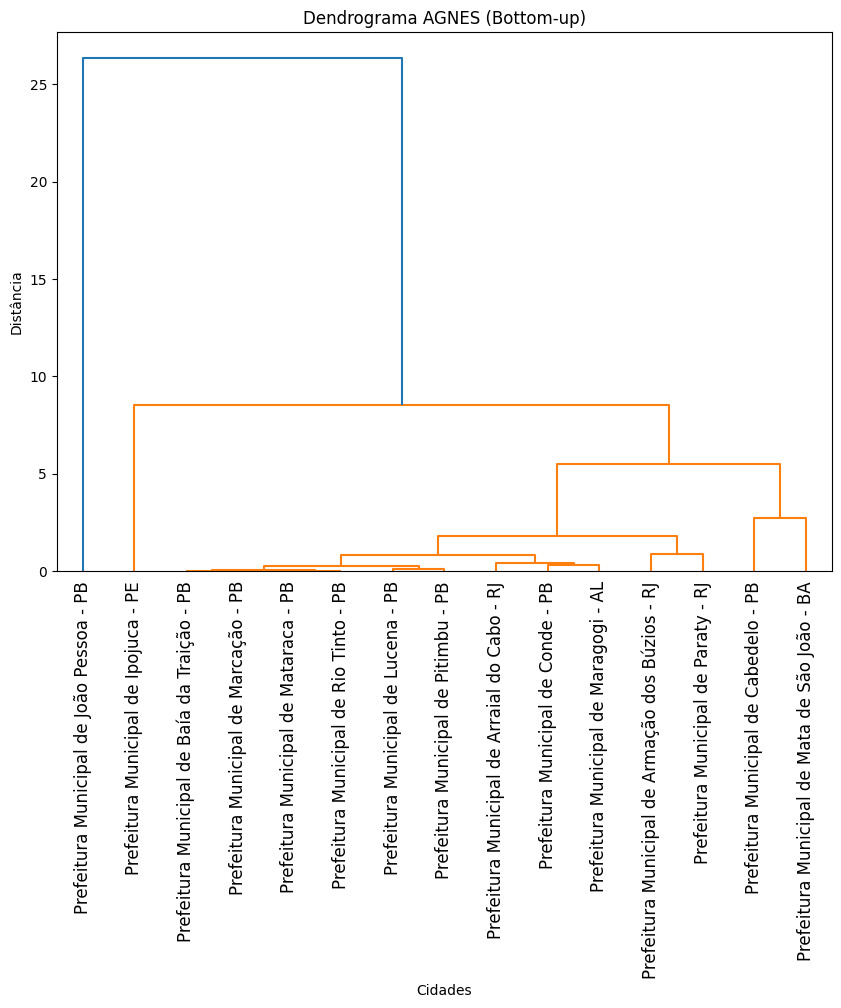

In [51]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import fcluster


# Remove a coluna 'Cidade' para usar apenas as coordenadas
data = pivot_df.drop(columns='Instituição')

# Escalonamento dos dados (opcional mas recomendado para técnicas de clusterização)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Clusterização AGNES (Algoritmo bottom-up)
agnes_linkage = linkage(data_scaled, method='ward')  # Pode mudar o método de ligação

# Plotar o dendrograma de AGNES
plt.figure(figsize=(10, 7))
dendrogram(agnes_linkage, labels=pivot_df['Instituição'].values)
plt.title('Dendrograma AGNES (Bottom-up)')
plt.xlabel('Cidades')
plt.ylabel('Distância')
plt.xticks(rotation=90)
plt.show()

# Definir 4 grupos finais para AGNES
agnes_clusters = fcluster(agnes_linkage, 4, criterion='maxclust')
pivot_df['Cluster_AGNES'] = agnes_clusters

In [52]:
pivot_df[['Instituição', 'Cluster_AGNES']]

Conta,Instituição,Cluster_AGNES
Ano,,
0,Prefeitura Municipal de Armação dos Búzios - RJ,1
1,Prefeitura Municipal de Arraial do Cabo - RJ,1
2,Prefeitura Municipal de Baía da Traição - PB,1
3,Prefeitura Municipal de Cabedelo - PB,2
4,Prefeitura Municipal de Conde - PB,1
5,Prefeitura Municipal de Ipojuca - PE,3
6,Prefeitura Municipal de João Pessoa - PB,4
7,Prefeitura Municipal de Lucena - PB,1
8,Prefeitura Municipal de Maragogi - AL,1


Interpretação dos Grupos:

Grupo 1: Pode agrupar cidades com valores de impostos consistentemente baixos em todas as séries (sugere regiões com menor arrecadação ou taxas mais baixas).

Grupo 2: Pode incluir cidades com uma combinação de séries de impostos elevadas para certos anos, indicando crescimento econômico ou ajustes fiscais específicos.

Grupo 3: Esse grupo pode agrupar cidades com valores intermediários em todas as séries, sugerindo uma estabilidade ou padrão comum em várias localidades.

Grupo 4: Pode identificar cidades com flutuações maiores nas séries de impostos, possivelmente devido a políticas fiscais voláteis ou condições econômicas instáveis.

In [53]:
# Clusterização DIANA (Algoritmo top-down)
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, fcluster

def diana_clustering(X, num_clusters):
    # Calcula a matriz de distância
    dist_matrix = squareform(pdist(X, metric='euclidean'))
    
    # Começa com todos os dados em um único cluster
    clusters = [list(range(X.shape[0]))]  # Índices dos dados
    dendro_data = []

    while len(clusters) < num_clusters:
        # Encontra o cluster mais dissimilar (com maior distância interna)
        max_diameter = -1
        to_split = -1
        for i, cluster in enumerate(clusters):
            if len(cluster) > 1:  # Somente tenta dividir clusters com mais de 1 elemento
                dist = dist_matrix[np.ix_(cluster, cluster)]
                intra_cluster_max = np.max(dist)
                if intra_cluster_max > max_diameter:
                    max_diameter = intra_cluster_max
                    to_split = i

        # Divide o cluster mais dissimilar em dois usando a maior distância média
        if to_split == -1:
            break

        cluster_to_split = clusters[to_split]
        dist = dist_matrix[np.ix_(cluster_to_split, cluster_to_split)]

        # Calcula a soma das distâncias para encontrar o ponto que mais se distancia
        avg_dist = np.mean(dist, axis=1)
        split_idx = np.argmax(avg_dist)
        cluster1 = [cluster_to_split[split_idx]]
        cluster2 = [i for i in cluster_to_split if i != cluster_to_split[split_idx]]

        clusters.pop(to_split)  # Remove o cluster original
        clusters.append(cluster1)  # Adiciona os novos clusters
        clusters.append(cluster2)

        # Adiciona ao dendrograma
        dendro_data.append([cluster1[0], cluster2[0], max_diameter])

    # Constrói o dendrograma
    Z = np.array(dendro_data)
    return Z, clusters

# Exemplo de uso
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Realizar a clusterização usando DIANA
Z, diana_clusters = diana_clustering(pivot_df[['IPTU', 'ISS', 'ITBI']].values, num_clusters=4)

diana_cluster_labels = [0] * 15  # Inicializa uma lista com 15 zeros

for cluster_index, cluster in enumerate(diana_clusters):
    for item in cluster:
        diana_cluster_labels[item] = cluster_index+1

pivot_df['Cluster_DIANA'] = diana_cluster_labels

In [56]:
pivot_df.head(2)

Conta                                      Instituição         IPTU  \
Ano                                                            2017   
0      Prefeitura Municipal de Armação dos Búzios - RJ  762910608.5   
1         Prefeitura Municipal de Arraial do Cabo - RJ  696656476.0   

Conta                                                                       \
Ano           2018          2019          2020          2021          2022   
0      995305936.0  1.306247e+09  1.532814e+09  8.564402e+09  1.474429e+09   
1      329427105.0  2.129603e+08  1.670944e+09  2.886744e+08  1.192975e+09   

Conta                                            ...         ITBI  \
Ano            2023          2024          2025  ...         2018   
0      2.607836e+09  4.306718e+09  4.752398e+09  ...  351933356.0   
1      1.550985e+09  1.453319e+09  1.606022e+09  ...  601743890.0   

Conta                                                                     \
Ano           2019          2020          2021         2022         2023   
0      617907943.0  1.075123e+09  1.232970e+09  709477222.0  846442018.0   
1      464784242.0  4.057880e+08  1.015036e+08  426037848.0  153511878.0   

Conta                             Cluster_AGNES Cluster_DIANA  
Ano            2024          2025                              
0      1.161779e+09  1.269140e+09             1             4  
1      1.882791e+08  1.519253e+08             1             4  

[2 rows x 30 columns]

Na sequência, use a técnica de redução de dimensão chamada ACP (Análise de Componentes Principais), para as séries com 27 valores de cada cidade.. Usando apena os dois primeiros fatores rode o algoritmo K-MEANS e determine os 4 grupos finais em cada caso. Compare o resultado com o resultado do
item anterior.


C:\Users\Home\AppData\Local\Temp\ipykernel_19628\2191157461.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data = pivot_df.drop(columns='Instituição')


Variância explicada pelo PC1: 0.9408099162718749
Variância explicada pelo PC2: 0.04861546655125135


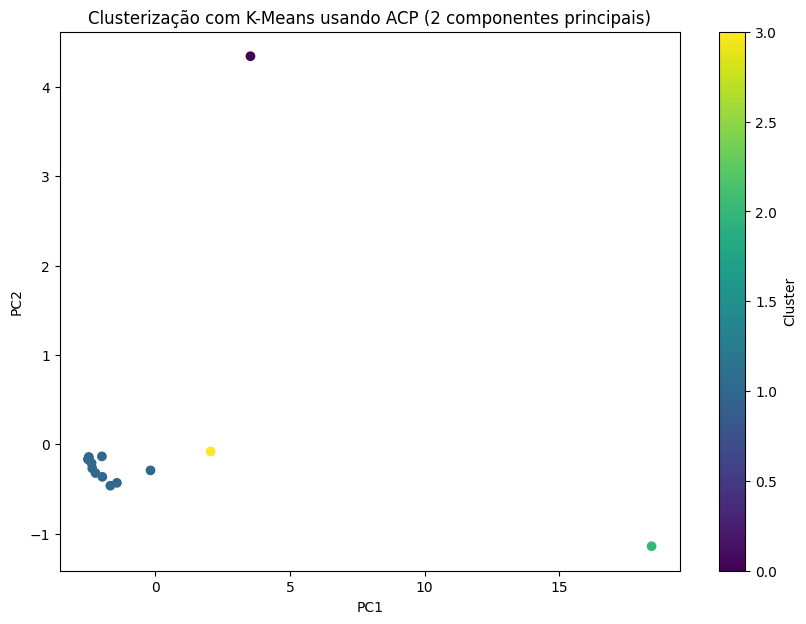

Comparação dos clusters:
Conta                                      Instituição Cluster_AGNES  \
Ano                                                                    
0      Prefeitura Municipal de Armação dos Búzios - RJ             1   
1         Prefeitura Municipal de Arraial do Cabo - RJ             1   
2         Prefeitura Municipal de Baía da Traição - PB             1   
3                Prefeitura Municipal de Cabedelo - PB             2   
4                   Prefeitura Municipal de Conde - PB             1   
5                 Prefeitura Municipal de Ipojuca - PE             3   
6             Prefeitura Municipal de João Pessoa - PB             4   
7                  Prefeitura Municipal de Lucena - PB             1   
8                Prefeitura Municipal de Maragogi - AL             1   
9                Prefeitura Municipal de Marcação - PB             1   
10       Prefeitura Municipal de Mata de São João - BA             2   
11               Prefeitura Municipal d

In [57]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


data = pivot_df.drop(columns='Instituição')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar ACP (Análise de Componentes Principais)
pca = PCA(n_components=2)  # Reduzindo para 2 componentes principais
data_pca = pca.fit_transform(data_scaled)

# Visualizar a variância explicada por cada componente principal
print(f"Variância explicada pelo PC1: {pca.explained_variance_ratio_[0]}")
print(f"Variância explicada pelo PC2: {pca.explained_variance_ratio_[1]}")

# Dataframe com as duas primeiras componentes principais
df_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
df_pca['Instituição'] = pivot_df['Instituição']

# Aplicar o algoritmo K-Means com 4 grupos
kmeans = KMeans(n_clusters=4, random_state=42)
df_pca['Cluster_KMeans'] = kmeans.fit_predict(data_pca)

# Visualizar os clusters no espaço das duas primeiras componentes principais
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster_KMeans'], cmap='viridis')
plt.title('Clusterização com K-Means usando ACP (2 componentes principais)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

# Comparar os clusters obtidos com K-Means com os clusters de AGNES
pivot_df['Cluster_KMeans'] = df_pca['Cluster_KMeans']
print("Comparação dos clusters:")
print(pivot_df[['Instituição', 'Cluster_AGNES', 'Cluster_KMeans']])

# Visualizar a correspondência entre os clusters
for cluster in range(4):
    print(f"Cluster K-Means {cluster}:")
    print(pivot_df[pivot_df['Cluster_KMeans'] == cluster]['Instituição'])

# Comparar os clusters entre AGNES e K-Means
comparison = pd.crosstab(pivot_df['Cluster_AGNES'], pivot_df['Cluster_KMeans'])
print("Matriz de comparação de clusters AGNES e K-Means:")
print(comparison)


In [59]:
df_pca

,PC1,PC2,Instituição,Cluster_KMeans
0,-1.665021,-0.463657,Prefeitura Municipal de Armação dos Búzios - RJ,1
1,-2.216264,-0.321875,Prefeitura Municipal de Arraial do Cabo - RJ,1
2,-2.480965,-0.170249,Prefeitura Municipal de Baía da Traição - PB,1
3,-0.174168,-0.292377,Prefeitura Municipal de Cabedelo - PB,1
4,-1.962379,-0.364509,Prefeitura Municipal de Conde - PB,1
5,3.535764,4.345007,Prefeitura Municipal de Ipojuca - PE,0
6,18.424496,-1.141296,Prefeitura Municipal de João Pessoa - PB,2
7,-2.335896,-0.268947,Prefeitura Municipal de Lucena - PB,1
8,-1.977993,-0.135486,Prefeitura Municipal de Maragogi - AL,1
9,-2.495623,-0.165990,Prefeitura Municipal de Marcação - PB,1


# Resumo dos dataframes

In [61]:
df.head(2) # df = (o dataframe base tratado e com as variações percentuais)

,Ano,Instituição,Conta,Valor,População,Variacao_Valor,Variacao_Populacao
0,2016,Prefeitura Municipal de Armação dos Búzios - RJ,IPTU,530515281.0,31067.0,NaN,NaN
1,2017,Prefeitura Municipal de Armação dos Búzios - RJ,IPTU,762910608.5,31370.5,43.805586,0.976921


In [63]:
df_previsao.tail(2) # df_previsao = (mesma coisa de df só que com as previsões, o Valor_k e Populacao_k é o k escolhido de treino e teste que ele pede no item 6)


,Ano,Instituição,Conta,Valor,População,Variacao_Valor,Variacao_Populacao,Variacao_População,Valor_k,Populacao_k
7,2024,Prefeitura Municipal de Rio Tinto - PB,ITBI,4.655413e+07,24305.571429,40.717507,NaN,0.0,6,6
8,2025,Prefeitura Municipal de Rio Tinto - PB,ITBI,5.076924e+07,24340.214286,40.717507,NaN,0.0,6,6


In [64]:
pivot_df.head(2) # pivot_df = pra fazer a clusterização ele pede que a gente modifique os dados pra outra forma, ele fica dessa forma menos intuitiva, e com os clusteres escolhidos


Conta                                      Instituição         IPTU  \
Ano                                                            2017   
0      Prefeitura Municipal de Armação dos Búzios - RJ  762910608.5   
1         Prefeitura Municipal de Arraial do Cabo - RJ  696656476.0   

Conta                                                                       \
Ano           2018          2019          2020          2021          2022   
0      995305936.0  1.306247e+09  1.532814e+09  8.564402e+09  1.474429e+09   
1      329427105.0  2.129603e+08  1.670944e+09  2.886744e+08  1.192975e+09   

Conta                                            ...         ITBI  \
Ano            2023          2024          2025  ...         2019   
0      2.607836e+09  4.306718e+09  4.752398e+09  ...  617907943.0   
1      1.550985e+09  1.453319e+09  1.606022e+09  ...  464784242.0   

Conta                                                                      \
Ano            2020          2021         2022         2023          2024   
0      1.075123e+09  1.232970e+09  709477222.0  846442018.0  1.161779e+09   
1      4.057880e+08  1.015036e+08  426037848.0  153511878.0  1.882791e+08   

Conta               Cluster_AGNES Cluster_DIANA Cluster_KMeans  
Ano            2025                                             
0      1.269140e+09             1             4              1  
1      1.519253e+08             1             4              1  

[2 rows x 31 columns]

In [65]:
df_pca.head(2) # df_pca = df com o pca feito baseado em df_pivot

,PC1,PC2,Instituição,Cluster_KMeans
0,-1.665021,-0.463657,Prefeitura Municipal de Armação dos Búzios - RJ,1
1,-2.216264,-0.321875,Prefeitura Municipal de Arraial do Cabo - RJ,1


Escolha 5 cidades litorâneas que não foram consideradas e usando uma técnica de análise discriminante indique a qual dos 4 grupos do item 7 você associaria essas cidades. Uma outra abordagem seria calcular a distância média de cada uma dessas cidades para os elementos de cada um desses quatro grupos e considerar como distância da cidade dada ao grupo como sendo a média aritmética.